Text mining Assignment


In [ ]:
import pandas as pd
import re
from textblob import TextBlob


In [ ]:
# importing the data which has been scrapped from amazon website 

data=pd.read_csv('extract_reviews_test2.csv')
pd.set_option('display.max_colwidth', -1)


C:\Users\Hp\AppData\Local\Temp/ipykernel_48252/1572698893.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
data.shape


(303, 2)

In [ ]:
list(data)


['stars', 'comment']

In [ ]:
data.head


<bound method NDFrame.head of                   stars  \
0    5.0 out of 5 stars   
1    5.0 out of 5 stars   
2    4.0 out of 5 stars   
3    4.0 out of 5 stars   
4    5.0 out of 5 stars   
..                  ...   
298  5.0 out of 5 stars   
299  5.0 out of 5 stars   
300  4.0 out of 5 stars   
301  5.0 out of 5 stars   
302  5.0 out of 5 stars   

                                                                                                                                                                                                                                                                                                                 comment  
0    \n\n\n\n\n\n\n\n  \n  \n    An efficient product. Quite a few options for washing different types of clothes.\n  \n                                                                                                                                                                                                  
1    \n\n\n\n\n

In [ ]:
data.isnull().sum()


stars      0
comment    5
dtype: int64

In [ ]:
data


,stars,comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n An efficient product. Quite a few options for washing different types of clothes.\n \n
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Very good\n \n
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Little bit noise is very more\n \n
3,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Noise levels are lowQuite easy to use (pre-defined modes)Value for money- too early to comment as it's just 2 months old. Our previous IFB was 15 years old and was up and running barring few issues. Now that's what we call value for money ;)\n \n
4,5.0 out of 5 stars,"\n\n\n\n\n\n\n\n \n \n This machine is a bit expensive but worth it. Very heavy and bulky hence less noise may be. Also it can work without stand and does not move while spinning. Bosch is a reliable brand hence we purchased, so far after a month it worked really well, let's see what comes next.\n \n"
...,...,...
298,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good product\n \n
299,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Washing quality is good\n \n
300,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Nice product. Does the job.\n \n
301,5.0 out of 5 stars,"\n\n\n\n\n\n\n\n \n \n Good performance,\n \n"


In [ ]:
import nltk
from nltk.corpus import stopwords
stop_words=stopwords.words('english')


In [ ]:
import nltk
from nltk.corpus import stopwords
stop_words=stopwords.words('english')


In [ ]:
#Defining a dcitionary containing all the emojis and their meanings
emojis={':)':'smile',':-)':'smile',';d':'wink',':-E':'vampire',':(':'sad',
        ':-(':'sad',':-<':'sad',':P':'raspberry',':O':'surprised',
        ':-@':'shocked',':@':'shocked',':-$':'confused',':\\':'annoyed',
        ':#':'mute',':X':'mute',':^)':'smile',':-&':'confused','$_$':'greedy',
        '@@':'eyeroll',':-!':'confused',':-D':'smile',':-0':'yell','O.o':'confused',
        '<(-_-)>':'robot','d[-_-]b':'dj',":'-)":'sadsmile',';)':'wink',
        ';-)':'wink','O:-)':'angel','O*-)':'angel','(:-D':'gossip','=^.^=':'cat'}



In [ ]:
#Defining a function to clean the data
def clean_text(kit):
    kit=str(kit).lower()
    kit=re.sub(r"@\S+",r'',kit)
    
    for i in emojis.keys():
        kit=kit.replace(i,emojis[i])
    kit=re.sub("\s+",' ',kit)
    kit=re.sub("\n",' ',kit)
    letters=re.sub('[^a-zA-Z]',' ',kit)
    return letters



In [ ]:
#Defining a function to remove the stop words        
def stops_words(words):
    filter_words=[]
    for w in words:
        if w not in stop_words:
            filter_words.append(w)
    return filter_words



In [ ]:
#Defining a function for sentiment analysis
def getSubjectivity(tex):
    return TextBlob(tex).sentiment.subjectivity

def getPolarity(tex):
    return TextBlob(tex).sentiment.polarity

def getAnalysis(score):
    if int(score)<0:
        return 'Negative'
    elif int(score)==0:
        return 'Neutral'
    elif int(score)>0:
        return 'Positive'



In [ ]:
#Cleaning the data
data['comment']=data['comment'].apply(lambda x:clean_text(x))



In [ ]:
#Removing stop words
data['comment']=data['comment'].apply(lambda x:x.split(" "))
data['comment']=data['comment'].apply(lambda x:stops_words(x))



In [ ]:
#Stemming
from nltk.stem import PorterStemmer
stem=PorterStemmer()
data['comment']=data['comment'].apply(lambda x: [stem.stem(k) for k in x])



In [ ]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemm=WordNetLemmatizer()
data['comment']=data['comment'].apply(lambda x: [lemm.lemmatize(j) for j in x])

data['comment']=data['comment'].apply(lambda x: ' '.join(x))



In [ ]:
#Preparing a target variable which shows the sentiment i.e, Subjectivity and Polarity
data['sentiment_subj']=data['comment'].apply(lambda x:getSubjectivity(x))
data['sentiment_subj'].describe()    

data['sentiment_pol']=data['comment'].apply(lambda x:getPolarity(x))
data['sentiment_pol'].describe()

sentiment=[]
for i in range(0,258,1):
    if data['sentiment_pol'].iloc[i,] < 0:
        sentiment.append('Negative')
    elif data['sentiment_pol'].iloc[i,] == 0:
        sentiment.append('Neutral')
    else:
        sentiment.append('Positive')

sentiment
Sentiment=pd.DataFrame(sentiment)
Sentiment.set_axis(['sentiment'],axis='columns',inplace=True)
data_new=pd.concat([data,Sentiment],axis=1)
data_new.shape


(303, 5)

In [ ]:
list(data_new)


['stars', 'comment', 'sentiment_subj', 'sentiment_pol', 'sentiment']

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

<AxesSubplot:xlabel='sentiment', ylabel='count'>

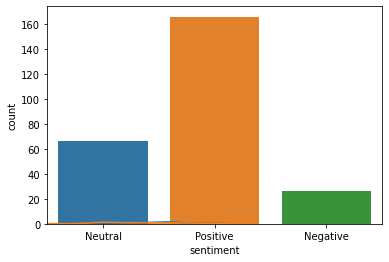

In [ ]:
#plotting

import seaborn as sns
sns.distplot(data_new['sentiment_subj'])
sns.distplot(data_new['sentiment_pol'])
sns.countplot(data_new['sentiment'])



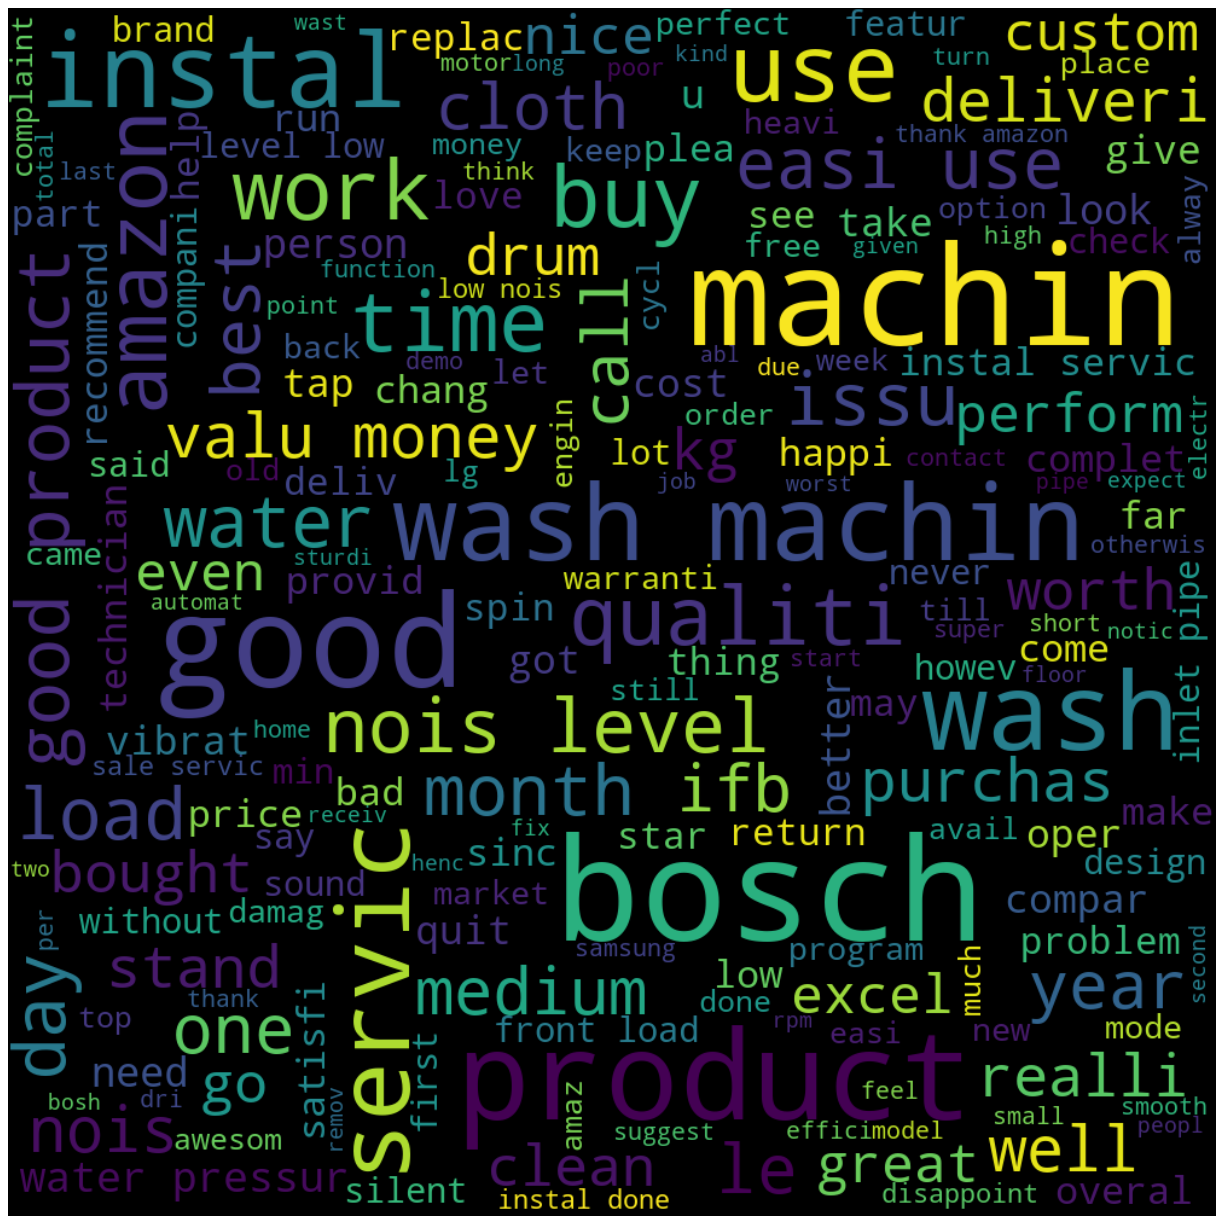

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
allwords = " ".join([twts for twts in data["comment"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()



In [ ]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.25,random_state=41)

data_train_clean=data_train['comment']
data_test_clean=data_test['comment']



In [ ]:
#Vectorize the data
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer(use_idf=True)
data_train_clean=vector.fit_transform(data_train_clean)
data_test_clean=vector.transform(data_test_clean)

data_train_clean.toarray()
data_train_clean.toarray().shape

vector.get_feature_names()


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abl',
 'absolut',
 'absorb',
 'accept',
 'accessori',
 'accommod',
 'action',
 'activ',
 'actual',
 'ad',
 'adapt',
 'adaptor',
 'addit',
 'adopt',
 'advic',
 'agent',
 'aggress',
 'ago',
 'ahead',
 'alarm',
 'allow',
 'almost',
 'alreadi',
 'also',
 'altern',
 'although',
 'alway',
 'amaz',
 'amazon',
 'amount',
 'amozon',
 'amt',
 'angular',
 'anoth',
 'answer',
 'anti',
 'anyon',
 'anyth',
 'apar',
 'apart',
 'applianc',
 'appoint',
 'appreci',
 'apprehens',
 'approx',
 'aqua',
 'arm',
 'around',
 'arrang',
 'ask',
 'assur',
 'author',
 'autom',
 'automat',
 'avail',
 'averag',
 'avoid',
 'away',
 'awesom',
 'babi',
 'back',
 'bad',
 'band',
 'bank',
 'bare',
 'bargain',
 'bazar',
 'bear',
 'begin',
 'behaviour',
 'belt',
 'beri',
 'best',
 'bet',
 'better',
 'bewar',
 'biggest',
 'biharbest',
 'bill',
 'bit',
 'board',
 'boga',
 'bolt',
 'book',
 'booster',
 'born',
 'bos',
 'bosch',
 'bosh',
 'bother',
 'bottom',
 'bought',
 'brand',
 'brilliant',
 'bt',
 'budget',
 'build',
 'b

In [ ]:
len('Positive')

8

In [ ]:
len('Negative')

8

In [ ]:
len('Positive') / len('Negative')


1.0

Inferences: It is a positive tweets.
